# **Exercise 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def f1(x):
    return x * np.sin(x) + 2 * x

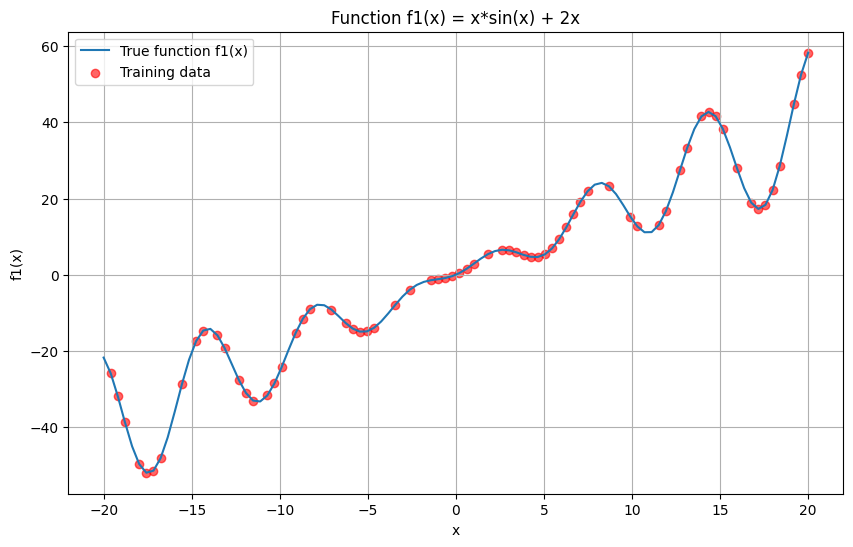

In [3]:
tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples)
y = f1(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42, shuffle=True
)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

X_plot = np.sort(X_test, axis=0)


plt.figure(figsize=(10, 6))
plt.plot(X, y, label='True function f1(x)')
plt.scatter(X_train, y_train, color='red', label='Training data', alpha=0.6)
plt.title('Function f1(x) = x*sin(x) + 2x')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show()

Linear Regression would be a poor choice,	it's too simple, it can't capture nonlinearity or oscillations. Gaussian Processes could be very good. It's probabilistic, handles smooth nonlinear functions well, but computationally expensive for large datasets. SVR	is good,	handles nonlinearity well, but requires hyperparameter tuning. Random Forest is	good with piecewise approximations but may struggle with smoothness.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


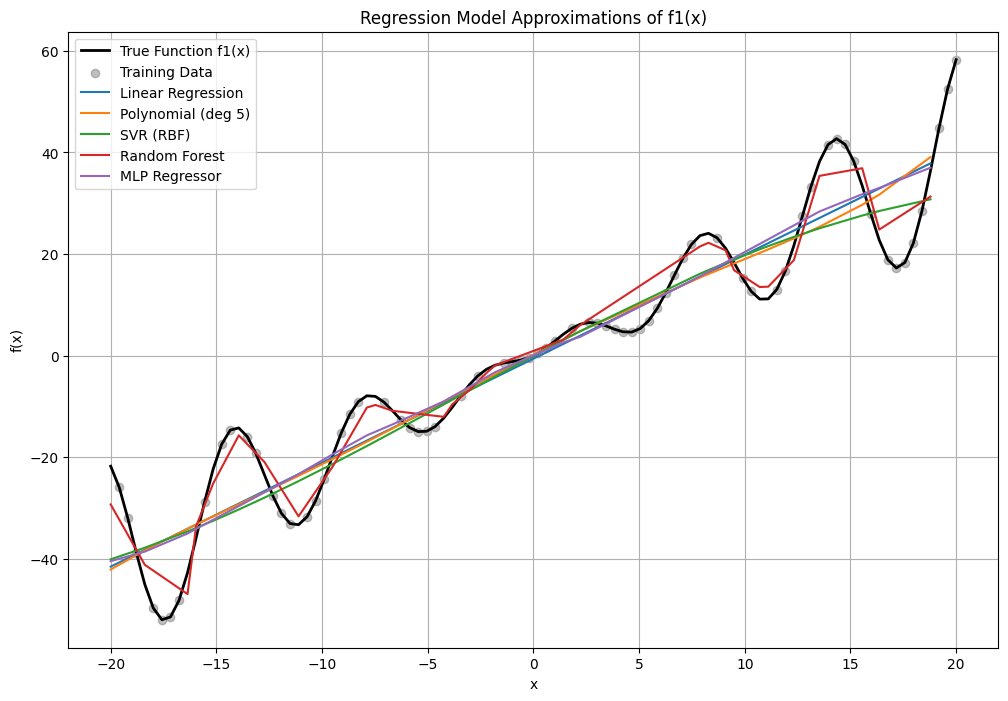

In [4]:
models = {}
predictions = {}

# 1. Linear Regression (OLS)
lr = LinearRegression()
lr.fit(X_train, y_train)
models['Linear Regression'] = lr
predictions['Linear Regression'] = lr.predict(X_test)

# 2. Polynomial Regression (degree 5 for balance)
poly = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
poly.fit(X_train, y_train)
models['Polynomial (deg 5)'] = poly
predictions['Polynomial (deg 5)'] = poly.predict(X_test)

# 3. Support Vector Regression (RBF kernel)
svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1))
svr.fit(X_train, y_train)
models['SVR (RBF)'] = svr
predictions['SVR (RBF)'] = svr.predict(X_test)

# 4. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
models['Random Forest'] = rf
predictions['Random Forest'] = rf.predict(X_test)

# 5. MLP Regressor (Neural Net)
mlp = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42))
mlp.fit(X_train, y_train)
models['MLP Regressor'] = mlp
predictions['MLP Regressor'] = mlp.predict(X_test)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(X, y, label='True Function f1(x)', color='black', linewidth=2)
plt.scatter(X_train, y_train, color='gray', label='Training Data', alpha=0.5)

for name, model in models.items():
    y_pred_plot = model.predict(X_plot)
    plt.plot(X_plot, y_pred_plot, label=name)

plt.title('Regression Model Approximations of f1(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Evaluate each model
print(f"{'Model':<20} {'MSE':>10} {'R² Score':>10}")
print("-" * 40)
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name:<20} {mse:10.3f} {r2:10.3f}")

Model                       MSE   R² Score
----------------------------------------
Linear Regression        57.420      0.892
Polynomial (deg 5)       57.824      0.891
SVR (RBF)                57.703      0.891
Random Forest             7.010      0.987
MLP Regressor            55.119      0.896


**Observations:**
Random Forest clearly stands out: excellent fit with very low error and high R². This suggests the function's structure can be effectively captured by piecewise models. The Linear, Polynomial, SVR, MLP all cluster around 0.89 R²: They're capturing the general trend but miss the finer oscillatory behavior.
Polynomial Regression didn’t help much: possibly underfitting or not expressive enough with degree 5. SVR & MLP need hyperparameter tuning to work better, they have potential but need adjustments (e.g., C, gamma, learning rate, hidden layers).

In [6]:
X = np.linspace(-tr, tr, n_samples).reshape(-1, 1)
y = f1(X).ravel()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42, shuffle=True
)

In [7]:
def feature_engineering(x):
    return np.hstack([
        x,                            # x
        x**2,                         # x^2
        x**3,                         # x^3
        np.sin(x),                    # sin(x)
        np.cos(x),                    # cos(x)
        x * np.sin(x),                # x * sin(x)
    ])

In [8]:
# Transform training and test data
X_train_feat = feature_engineering(X_train)
X_test_feat = feature_engineering(X_test)

# Fit Random Forest on engineered features
rf_enhanced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_enhanced.fit(X_train_feat, y_train)
y_pred_enhanced = rf_enhanced.predict(X_test_feat)

# Evaluate
mse = mean_squared_error(y_test, y_pred_enhanced)
r2 = r2_score(y_test, y_pred_enhanced)

print("🔍 Random Forest with Engineered Features")
print(f"MSE: {mse:.3f}")
print(f"R²:  {r2:.3f}")

🔍 Random Forest with Engineered Features
MSE: 15.717
R²:  0.970


The original Random Forest actually performed better. Random Forests are non-parametric: they can already learn very flexible patterns without explicit transformations. Feature engineering is more useful for simpler models like linear regression or SVR, which can't learn complex transformations internally.

# **Exercise 2**

In [9]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=2000, random_state=42)

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression on Multivariate Data")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

Linear Regression on Multivariate Data
MSE: 57.42
R² Score: 0.892


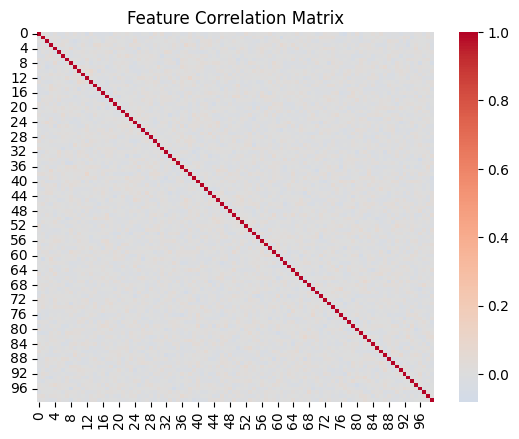

In [11]:
import seaborn as sns
import pandas as pd

corr_matrix = pd.DataFrame(X).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

In [12]:
# Harder version
X_hard, y_hard = make_regression(n_samples=2000, n_features=50,
                                  n_informative=10, noise=25, random_state=42)

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_hard, y_hard, train_size=0.7, random_state=42)

lr_hard = LinearRegression()
lr_hard.fit(X_train_h, y_train_h)

y_pred_h = lr_hard.predict(X_test_h)
mse_h = mean_squared_error(y_test_h, y_pred_h)
r2_h = r2_score(y_test_h, y_pred_h)

print("Harder Problem with Noise + Extra Features")
print(f"MSE: {mse_h:.2f}")
print(f"R² Score: {r2_h:.3f}")

Harder Problem with Noise + Extra Features
MSE: 648.39
R² Score: 0.978


In [13]:
coefs = lr_hard.coef_
sorted_indices = np.argsort(np.abs(coefs))
print("🔍 Smallest-magnitude coefficients (likely non-informative):")
for idx in sorted_indices[:10]:
    print(f"Feature {idx}: Coef = {coefs[idx]:.4f}")

🔍 Smallest-magnitude coefficients (likely non-informative):
Feature 46: Coef = -0.0343
Feature 35: Coef = 0.0434
Feature 44: Coef = -0.0813
Feature 36: Coef = -0.0900
Feature 13: Coef = -0.0935
Feature 19: Coef = 0.1318
Feature 24: Coef = -0.1529
Feature 38: Coef = 0.1803
Feature 1: Coef = 0.2138
Feature 37: Coef = -0.2467


Features with coefficients close to 0 likely do not contribute to the prediction — they're non-informative. If noise is high or features are strongly correlated, coefficients might fluctuate even for uninformative variables.

# **Exercise 3**

In [16]:
df = pd.read_csv("/content/SummaryofWeather.csv")
df.head()

<ipython-input-16-4300e6f5997a>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/SummaryofWeather.csv")


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [18]:
# Count non-null MeanTemp values per sensor
sensor_counts = df.groupby('STA')['MeanTemp'].count().sort_values(ascending=False)

# Top 10 most complete sensors
top_10_sensors = sensor_counts.head(10).index
df_top_sensors = df[df['STA'].isin(top_10_sensors)]

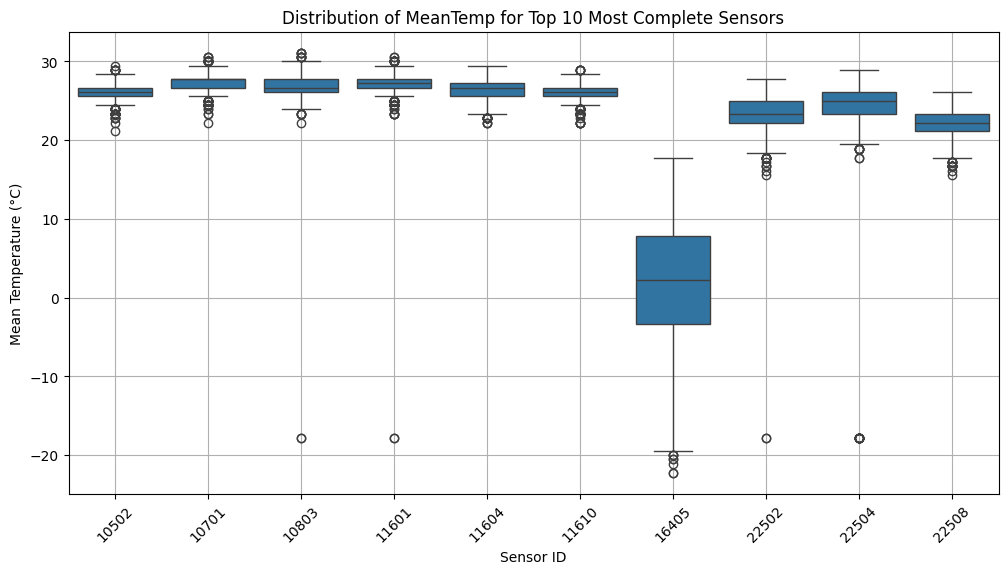

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_sensors, x='STA', y='MeanTemp')
plt.title('Distribution of MeanTemp for Top 10 Most Complete Sensors')
plt.xlabel('Sensor ID')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

If distributions cluster tightly around certain temperatures across sensors, it may suggest similar climate conditions. For example, here only sensor 16405 would be an outlier.

Is normalization necessary?
It depends on the model we're going to use:

For distance-based models (e.g., KNN, SVM, Neural Networks): Yes, normalize/scale.
For tree-based models (e.g., Random Forest, XGBoost): No, normalization usually not required.

To do forecasting, we should handle missing values, maybe even drop entire NaN columns. Convert date column to datetime format, and label encode the necessary columns.

In [24]:
# Filter for sensor 22508
sensor_22508 = df[df['STA'] == 22508].copy()

# Ensure Date is parsed as datetime
sensor_22508['Date'] = pd.to_datetime(sensor_22508['Date'])

# Sort by date to ensure time series consistency
sensor_22508 = sensor_22508.sort_values('Date')

# Extract relevant columns
mean_temp_series = sensor_22508[['Date', 'MeanTemp']].dropna()

# Quick look at the resulting data
print(mean_temp_series.head())

            Date   MeanTemp
57877 1940-01-01  20.000000
57878 1940-01-02  19.444444
57879 1940-01-03  20.000000
57880 1940-01-04  21.111111
57881 1940-01-05  18.333333


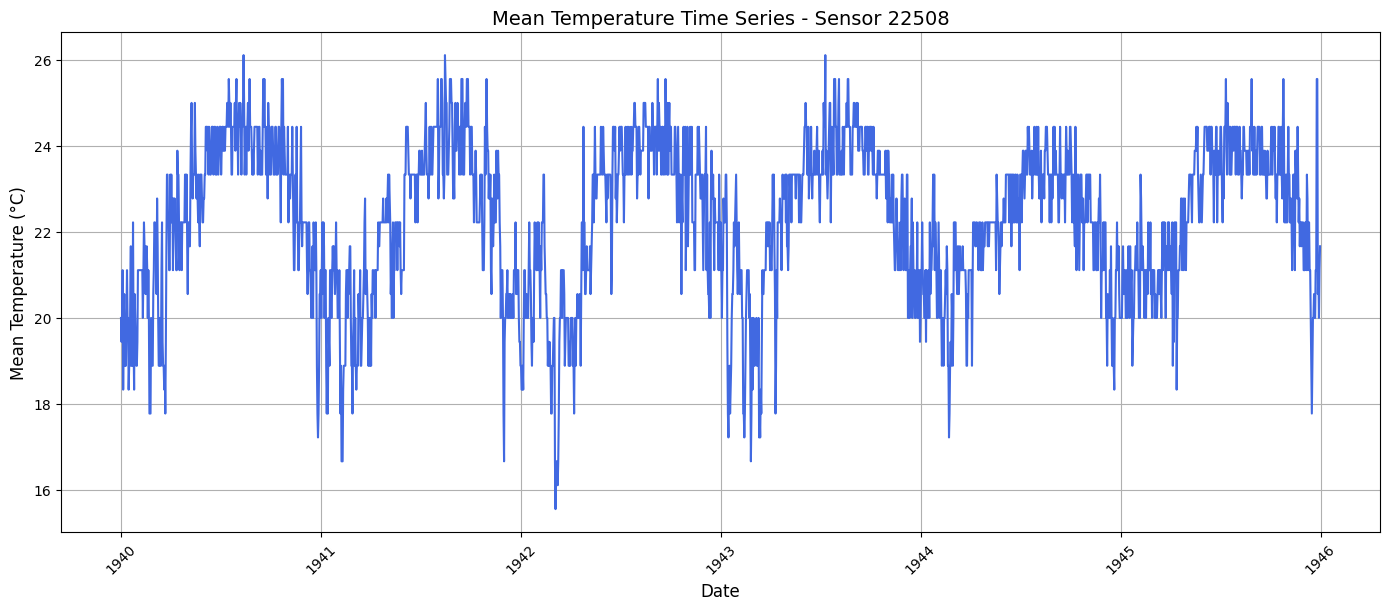

In [25]:
plt.figure(figsize=(14, 6))
plt.plot(mean_temp_series['Date'], mean_temp_series['MeanTemp'], color='royalblue')
plt.title("Mean Temperature Time Series - Sensor 22508", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean Temperature (°C)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [26]:
def create_rolling_window_features(series, window_size):
    X = []
    y = []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

In [27]:
mean_temp_series['Year'] = mean_temp_series['Date'].dt.year

# Filter training data (1940–1944)
train_data = mean_temp_series[mean_temp_series['Year'] < 1945]

# Filter test data (1945 only)
test_data = mean_temp_series[mean_temp_series['Year'] == 1945]

In [28]:
W = 7  # e.g., using past 7 days to predict the next day

# Apply on training data
X_train, y_train = create_rolling_window_features(train_data['MeanTemp'].values, W)

# For test, combine end of train with test to allow first window to be valid
combined = pd.concat([train_data.tail(W), test_data])
X_test, y_test = create_rolling_window_features(combined['MeanTemp'].values, W)

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42),
    "SVR (RBF Kernel)": SVR(kernel='rbf', C=1.0, epsilon=0.2),
    "Polynomial Regression (deg=3)": make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))

print(f"{'Model':35} {'MSE':>10} {'R² Score':>10}")
print("-" * 60)
for name, mse, r2 in results:
    print(f"{name:35} {mse:10.2f} {r2:10.3f}")

Model                                      MSE   R² Score
------------------------------------------------------------
Linear Regression                         0.74      0.687
Random Forest                             0.83      0.649
MLP Regressor                             0.76      0.679
SVR (RBF Kernel)                          0.75      0.683
Polynomial Regression (deg=3)             0.86      0.636


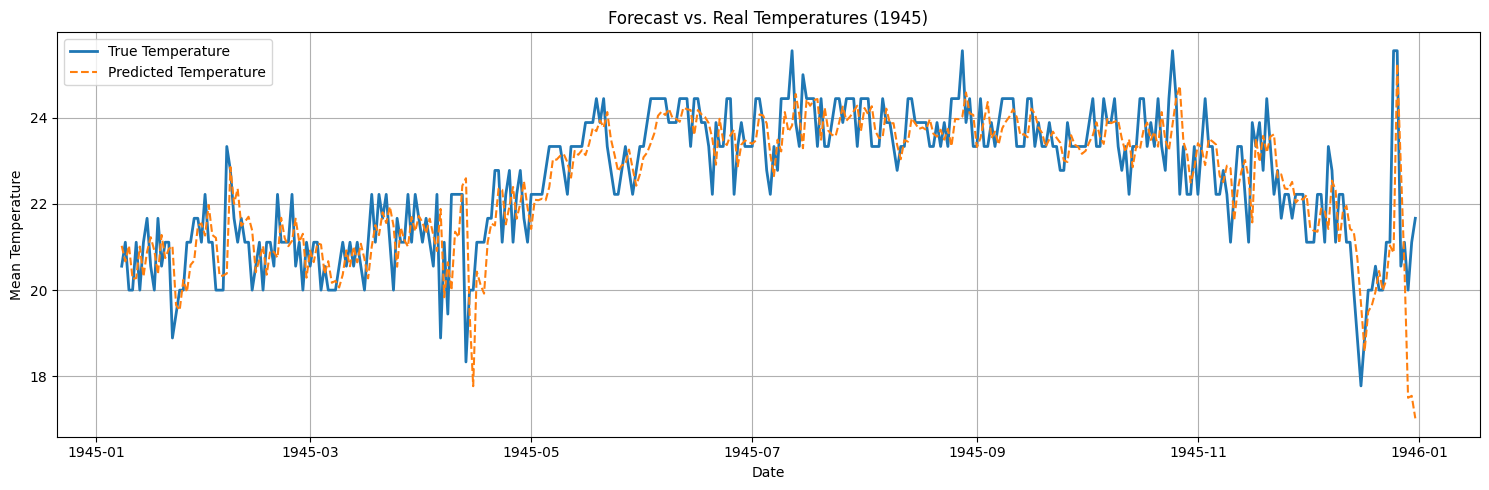

In [32]:
plt.figure(figsize=(15, 5))
plt.plot(test_data['Date'].iloc[W:].values, y_test[W:], label='True Temperature', linewidth=2)
plt.plot(test_data['Date'].iloc[W:].values, y_pred[W:], label='Predicted Temperature', linestyle='--')
plt.title('Forecast vs. Real Temperatures (1945)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

With the current setup (one-step forecast):

You only predict the next day using the past W days.
To predict 2, 3, or N days ahead, you would need to:
Use the model recursively (i.e., feed predictions back as input).
Or train direct multi-step models.

Our current model is ok, it follows trends pretty well, the two series are similar.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Tuned models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42),
    "SVR (RBF Kernel)": SVR(kernel='rbf', C=10, epsilon=0.2)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))

print(f"{'Model':35} {'MSE':>10} {'R² Score':>10}")
print("-" * 60)
for name, mse, r2 in results:
    print(f"{name:35} {mse:10.2f} {r2:10.3f}")

Model                                      MSE   R² Score
------------------------------------------------------------
Random Forest                             0.79      0.665
MLP Regressor                             0.91      0.613
SVR (RBF Kernel)                          0.80      0.660


Our performance is worse with this tuning.